In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from scipy . stats import norm
california_housing = pd. read_csv('/content/housing.csv')
print (california_housing)
print (california_housing . columns)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [ ]:
import pandas as pd
from scipy.stats import norm
california_housing = pd.read_csv('/content/housing.csv')
columns = ['latitude', 'total_rooms', 'housing_median_age', 'total_bedrooms']
# Adjust if necessary
params = {}
for col in columns:
  if col in california_housing . columns:
    data = california_housing[col]
    data_clean = data . dropna()
    mu,sigma = norm . fit(data_clean)
    params[col] = (mu, sigma)
  else:
    print("Column '{col}' not found in the dataframe. ")
    for col, (mu, sigma) in params. items():
      print( " Column: { col } " )
      print( " Mean (mu): { mu: .4f } " )
      print( " Standard Deviation (sigma): { sigma : .4f } " )
      print ( " -------------------------------")

In [ ]:
import numpy as np
from scipy . stats import norm
california_housing = pd.read_csv('/content/housing.csv')
latitude = california_housing['latitude']
mu, sigma = norm . fit(latitude)
values = [ 50, 75, 80]
log_likelihoods = [norm . logpdf(x, mu, sigma) for x in values]
print ( " Log-likelihood values: " )
print ( " Value 50:" , log_likelihoods[ 0 ])
print ( " Value 75:" , log_likelihoods[ 1 ])
print ( " Value 80:" , log_likelihoods[ 2 ])
print ( " Maximum likelihood value: " , mu)

 Log-likelihood values: 
 Value 50: -24.30388630999708
 Value 75: -171.5403881924758
 Value 80: -217.42758836196197
 Maximum likelihood value:  35.63186143410853


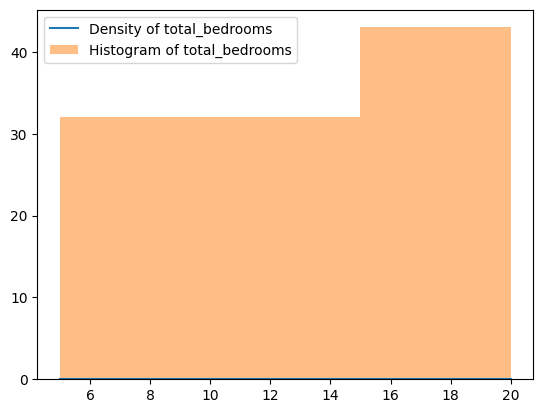

In [ ]:
import numpy as np
import matplotlib . pyplot as plt
from scipy . stats import gaussian_kde
california_housing = pd. read_csv('/content/housing.csv')
columns = ['latitude' , 'total_rooms' , 'housing_median_age' , 'total_bedrooms']
for col in columns:
  data = california_housing[col]
  data_cleaned = data . replace([np . inf, - np . inf], np . nan) . dropna()
  bins = [ 5 , 10 , 15 , 20 ]
  hist, bin_edges = np . histogram(data_cleaned, bins= bins)
  kde = gaussian_kde(data_cleaned)
x = np.linspace(bin_edges[0], bin_edges[-1], 100)
density = kde.evaluate(x)
plt.plot(x, density, label=f"Density of {col}")
plt.hist(data_cleaned, bins=bins, alpha=0.5, label=f"Histogram of {col}")
plt.legend()
plt . show()